In [1]:
%matplotlib widget

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [51]:
smeared_grid = np.load("smeared_grid.npy")
vis_grid = np.load("vis.npy")
pcf_grid = np.load("pcf.npy")
print(f"smeared_grid: {smeared_grid.shape}")
print(f"vis_grid: {vis_grid.shape}")
print(f"pcf_grid: {pcf_grid.shape}")

smeared_grid: (108, 1, 1024, 1024)
vis_grid: (108, 1, 1024, 1024)
pcf_grid: (108, 1, 1024, 1024)


In [ ]:
def norm_and_std(vis, pcf):
    norm = np.abs(vis/pcf.real)
    std = np.std(vis, axis=(0,1), where)

In [102]:
norm_vis = np.abs(vis_grid/smeared_grid.real)
print(f"norm_vis: {norm_vis.shape}")
vis = np.abs(vis_grid/pcf_grid.real)
print(f"vis: {vis.shape}")
norm_vis_std = np.std(norm_vis, axis=(0,1), where=np.bitwise_and(~np.isnan(norm_vis), ~np.isinf(norm_vis)))
print(f"norm_vis_std: {norm_vis_std.shape}")
vis_std = np.std(vis, axis=(0,1), where=np.bitwise_and(~np.isnan(vis), ~np.isinf(vis)))
print(f"vis_std: {vis_std.shape}")


/var/folders/r_/5_7vfq057t5g1s7xy9hsbhd518n8zd/T/ipykernel_28069/2162290675.py:1: RuntimeWarning: divide by zero encountered in divide
  norm_vis = np.abs(vis_grid/smeared_grid.real)
/var/folders/r_/5_7vfq057t5g1s7xy9hsbhd518n8zd/T/ipykernel_28069/2162290675.py:1: RuntimeWarning: invalid value encountered in divide
  norm_vis = np.abs(vis_grid/smeared_grid.real)


norm_vis: (108, 1, 1024, 1024)


/var/folders/r_/5_7vfq057t5g1s7xy9hsbhd518n8zd/T/ipykernel_28069/2162290675.py:3: RuntimeWarning: divide by zero encountered in divide
  vis = np.abs(vis_grid/pcf_grid.real)
/var/folders/r_/5_7vfq057t5g1s7xy9hsbhd518n8zd/T/ipykernel_28069/2162290675.py:3: RuntimeWarning: invalid value encountered in divide
  vis = np.abs(vis_grid/pcf_grid.real)


vis: (108, 1, 1024, 1024)
norm_vis_std: (1024, 1024)
vis_std: (1024, 1024)


In [103]:
def create_hist(data, nbins=500):
    mask = np.bitwise_and(~np.isnan(data), ~np.isinf(data))
    hist, xvals = np.histogram(data[mask], nbins)
    xvals = (xvals[1:]+xvals[:1])/2
    return hist, xvals

In [104]:
norm_hist, norm_xvals = create_hist(norm_vis)
vis_hist, vis_xvals = create_hist(vis)
norm_std_hist, norm_std_xvals = create_hist(norm_vis_std)
vis_std_hist, vis_std_xvals = create_hist(vis_std)


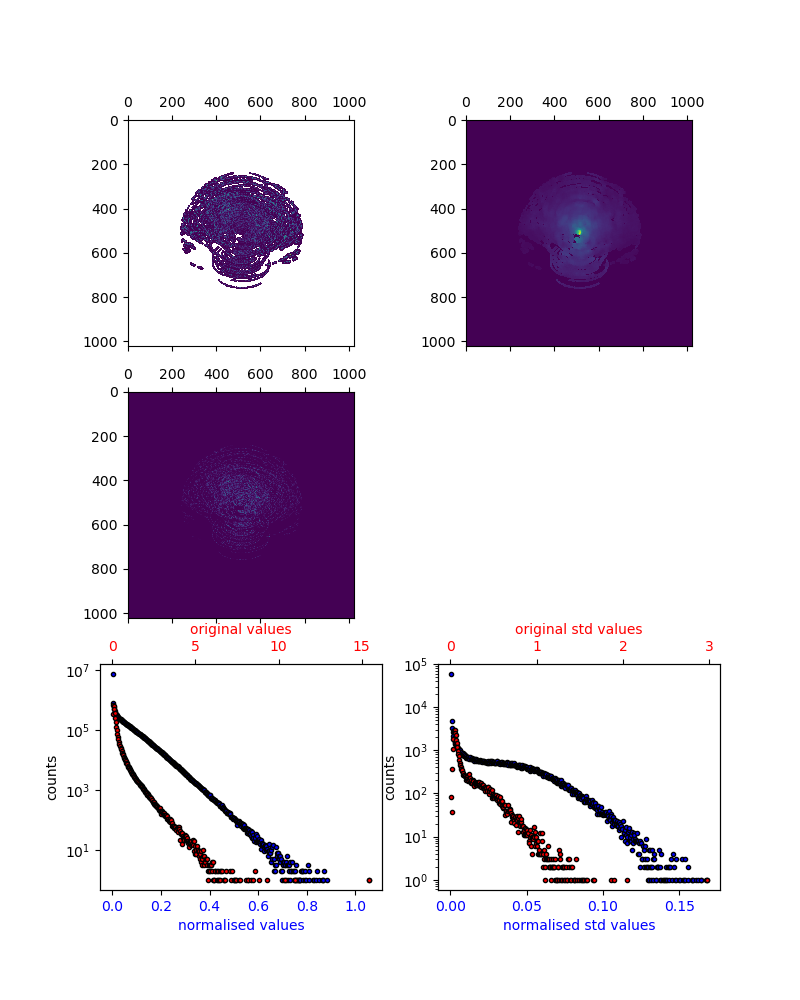

In [105]:
fig = plt.figure(figsize=(8,10))
ax = fig.subplots(3,2)
ax[0,0].matshow(norm_vis[0,0,...])
ax[0,1].matshow(smeared_grid[0,0,...].real)
ax[1,0].matshow(np.abs(vis_grid[0,0,...]))
ax[1,1].axis('off')

ax[2,0].semilogy(norm_xvals, norm_hist, '.', color='blue', markeredgecolor='k')
ax[2,0].set_ylabel('counts')
ax[2,0].set_xlabel('normalised values', color='blue')
ax[2,0].tick_params(axis='x',labelcolor='blue')

ax20twin = ax[2,0].twiny()
ax20twin.semilogy(vis_xvals, vis_hist, '.', color='red', markeredgecolor='k')
ax20twin.set_xlabel('original values', color='red')
ax20twin.tick_params(axis='x', labelcolor='red')

ax[2,1].semilogy(norm_std_xvals, norm_std_hist, '.', color='blue', markeredgecolor='k')
ax[2,1].set_ylabel('counts')
ax[2,1].set_xlabel('normalised std values', color='blue')
ax[2,1].tick_params(axis='x', labelcolor='blue')

ax21twin = ax[2,1].twiny()
ax21twin.semilogy(vis_std_xvals, vis_std_hist, '.', color='red', markeredgecolor='k')
ax21twin.set_xlabel('original std values', color='red')
ax21twin.tick_params(axis='x', labelcolor='red')


In [29]:
plt.close('all')